<a href="https://colab.research.google.com/github/carlos-souza-blip/Analise-de-risco/blob/main/test_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_excel('rmhp_selecao_go.xlsx')

In [ ]:
dados

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2333988,1,44,A09,3,2015,1,0,2,0,0,0,0
1,2333988,1,57,A491,2,2015,2,1,2,0,0,0,0
2,2333988,3,18,B188,4,2015,1,0,2,0,0,1,0
3,2333988,1,49,I10,2,2015,1,0,2,0,0,0,1
4,2333988,3,44,J068,2,2015,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004665,9813349,3,44,S520,1,2021,1,0,1,0,0,0,0
1004666,9813349,3,50,S521,2,2021,2,0,2,0,0,0,0
1004667,9813349,3,64,S522,1,2021,3,0,1,0,0,0,0
1004668,9813349,3,97,M169,4,2021,6,0,2,0,0,0,0


# **Organização dos Dados**

In [ ]:
# Movendo a coluna ano na primeira posição do banco de dados
dados = dados[['ano', 'obito', 'icc', 'ieh', 'cid50', 'uso_uti', 'permanencia', 'fxidade']]
# Verificando o dataset
dados

,ano,obito,icc,ieh,cid50,uso_uti,permanencia,fxidade
0,2015,0,0,0,0,0,2,1
1,2015,0,0,0,1,0,2,2
2,2015,0,1,0,0,0,2,1
3,2015,0,0,1,0,0,2,1
4,2015,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
1004665,2021,0,0,0,0,0,1,1
1004666,2021,0,0,0,0,0,2,2
1004667,2021,0,0,0,0,0,1,3
1004668,2021,0,0,0,0,0,2,6


In [ ]:
# Verificando o formato dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004670 entries, 0 to 1004669
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   ano          1004670 non-null  int64
 1   obito        1004670 non-null  int64
 2   icc          1004670 non-null  int64
 3   ieh          1004670 non-null  int64
 4   cid50        1004670 non-null  int64
 5   uso_uti      1004670 non-null  int64
 6   permanencia  1004670 non-null  int64
 7   fxidade      1004670 non-null  int64
dtypes: int64(8)
memory usage: 61.3 MB


In [ ]:
# separando somente o ano de 2016
#dados = dados.query('ano == 2016')
#dados

Aplicando o modelo de regressao logistica

In [ ]:
# importando outras livrarias 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [ ]:
modelo = smf.glm(formula= 'obito ~ icc + ieh + uso_uti + permanencia + fxidade', data=dados,
                 family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:              1004670
Model:                            GLM   Df Residuals:                  1004664
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8100e+05
Date:                Mon, 28 Jun 2021   Deviance:                   3.6200e+05
Time:                        14:00:31   Pearson chi2:                 8.71e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.7270      0.014   -342.766      

In [ ]:
print(np.exp(modelo.params[1:]))

icc             1.385732
ieh             0.896532
uso_uti        10.457497
permanencia     1.028937
fxidade         1.553011
dtype: float64


In [ ]:
# Agora vamos fazer com sklearn para aproveitar as métricas
model = LogisticRegression(penalty='none', solver='newton-cg')
y= dados.obito
x = pd.get_dummies(dados[['icc', 'ieh', 'uso_uti', 'permanencia', 'fxidade']])
print(x)

         icc  ieh  uso_uti  permanencia  fxidade
0          0    0        0            2        1
1          0    0        0            2        2
2          1    0        0            2        1
3          0    1        0            2        1
4          0    0        0            2        1
...      ...  ...      ...          ...      ...
1004665    0    0        0            1        1
1004666    0    0        0            2        2
1004667    0    0        0            1        3
1004668    0    0        0            2        6
1004669    0    0        0            1        5

[1004670 rows x 5 columns]


In [ ]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.coef_)

[[ 0.32622884 -0.10922178  2.34731912  0.02852607  0.44019548]]


In [ ]:
prob = model.predict_proba(x)
prob[:, 1]

array([0.01434784, 0.02210695, 0.01977284, ..., 0.03299528, 0.11621966,
       0.07603728])

In [ ]:
confusion_matrix(y, model.predict(x))

array([[939035,   5039],
       [ 57031,   3565]])

In [ ]:
pd.crosstab(y, model.predict(x))

col_0,0,1
obito,,
0,939035,5039
1,57031,3565


In [ ]:
acuracia = accuracy_score(y, model.predict(x))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9382 de acurácia.


In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    944074
           1       0.41      0.06      0.10     60596

    accuracy                           0.94   1004670
   macro avg       0.68      0.53      0.54   1004670
weighted avg       0.91      0.94      0.92   1004670



In [ ]:
clf = LogisticRegression(solver="liblinear", random_state= 0).fit(x,y)
print('AUC: %0.4f' % roc_auc_score(y, clf.predict_proba(x)[:, 1]))

AUC: 0.8376


In [ ]:
prob = model.predict_proba(x)
prob = prob[:, 1]
print(prob)
prob

[0.01434784 0.02210695 0.01977284 ... 0.03299528 0.11621966 0.07603728]


array([0.01434784, 0.02210695, 0.01977284, ..., 0.03299528, 0.11621966,
       0.07603728])

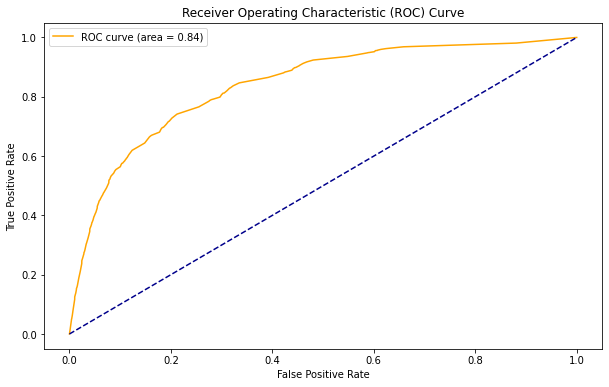

In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(y, prob)

In [ ]:
roc_auc_score(y, clf.decision_function(x))

0.8376315378831302

# Realizando teste do modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#np.random.seed(0)
x_treino, x_valid, y_treino, y_valid = train_test_split(x,y, test_size = 0.30)

In [ ]:
x_treino.shape, x_valid.shape

((703269, 5), (301401, 5))

In [ ]:
x_treino, x_valid, y_treino, y_valid

(        icc  ieh  uso_uti  permanencia  fxidade
 639342    1    0        0            2        2
 308723    0    0        0            2        2
 738420    0    0        0            2        1
 899344    2    0        0            2        6
 143748    1    0        0            2        5
 ...     ...  ...      ...          ...      ...
 122523    0    0        0            1        1
 122389    0    0        0            2        5
 134446    2    0        0            3        3
 702750    0    0        0            1        3
 239947    1    0        0            3        3
 
 [703269 rows x 5 columns],         icc  ieh  uso_uti  permanencia  fxidade
 698293    2    0        0            1        3
 2474      0    0        0            2        1
 46596     0    0        0            3        1
 340850    1    0        0            2        5
 423177    0    0        0            1        1
 ...     ...  ...      ...          ...      ...
 594787    0    0        0            2 

In [ ]:
p = clf.predict(x_valid)
p

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Acoracia
np.mean(y_valid==p)

0.9382118838358201

In [ ]:
dados.columns

Index(['ano', 'obito', 'icc', 'ieh', 'cid50', 'uso_uti', 'permanencia'], dtype='object')

In [ ]:
dados['icc'].value_counts()

0    805332
1    123270
2     67656
6      7711
3       701
Name: icc, dtype: int64

In [ ]:
p = (x_valid['icc']==6).astype(np.int64)
np.mean(y_valid == p)

0.9346452068838524

In [ ]:
#Tenta ver a métrica de treino e teste e separa junto com essa ROC
roc_auc_score(y_valid, clf.decision_function(x_valid), average = None)

0.8372150529428242

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
x, y = make_multilabel_classification(random_state=0)
clf = MultiOutputClassifier(clf).fit(x, y)

In [ ]:
y_pred = clf.predict_proba(x)

In [ ]:
y_pred = np.transpose([pred[:, 1] for pred in y_pred])
roc_auc_score(y, y_pred, average=None)

array([0.82664884, 0.86034414, 0.94181818, 0.8502652 , 0.94809095])

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV().fit(x, y)
roc_auc_score(y, clf.decision_function(x), average=None)

0.8381444126983832

In [ ]:
https://stackoverflow.com/questions/62238336/how-can-i-find-the-c-ctatistic-or-auroc-using-logistic-regression-in-r